In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read data from csv
insider_df = pd.read_csv("Resources/Insider_Trading_Cleaned.csv")
insider_df.head()

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
0,0 Relic Inc.,03/09/2020 17:31,01/09/2020,0R,Cirne Lewis,CEO 10%,S - Sale,62.74,-35500,6202967,-1%,-2227184,61.730000,60.320000,61.529999,62.799999
1,0 Relic Inc.,02/10/2020 17:52,01/10/2020,0R,Cirne Lewis,CEO 10%,S - Sale,57.48,-34500,6168467,-1%,-1982897,56.029999,56.310001,57.150002,57.349998
2,0 Relic Inc.,04/11/2020 17:03,02/11/2020,0R,Cirne Lewis,CEO 10%,S - Sale,58.92,-35500,6132976,-1%,-2091741,63.330002,63.150002,60.959999,58.919998
3,0 Relic Inc.,10/11/2020 19:13,10/11/2020,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0,260009,55.450001,53.730000,55.450001,53.730000
4,0 Relic Inc.,17/11/2020 18:13,16/11/2020,0R,Sachleben Mark,CFO,S - Sale+OE,56.00,-2351,371740,-1%,-131661,55.150002,56.450001,56.029999,54.790001


In [3]:
insider_df.describe()

,Price,Quantity,Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
count,37709.000000,3.770900e+04,3.770900e+04,3.770900e+04,37709.000000,37709.000000,37709.000000,37709.000000
mean,152.139974,-7.627821e+04,5.653078e+06,-5.149147e+06,122.094935,122.082253,127.352728,127.591811
std,514.842338,1.703802e+06,6.446172e+07,5.293200e+07,176.084026,176.261865,175.538964,175.814594
min,0.000000,-1.328413e+08,0.000000e+00,-2.147484e+09,0.000000,0.000000,0.000000,0.000000
25%,35.000000,-1.800000e+04,1.759500e+04,-1.586387e+06,29.500000,29.430000,35.090000,35.230000
50%,79.690000,-5.000000e+03,6.244300e+04,-4.133420e+05,75.059998,75.230003,79.309998,79.589996
75%,153.040000,-1.147000e+03,2.671370e+05,-8.331000e+04,145.229996,144.990005,150.000000,150.250000
max,81700.600000,6.342412e+07,2.147484e+09,2.147484e+09,2664.810059,2623.949951,2573.479980,2635.159912


In [4]:
insider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 37709 non-null  object 
 1   Filing Date             37709 non-null  object 
 2   Trade Date              37709 non-null  object 
 3   Ticker                  37709 non-null  object 
 4   Insider Name            37709 non-null  object 
 5   Title                   37709 non-null  object 
 6   Transaction Type        37709 non-null  object 
 7   Price                   37709 non-null  float64
 8   Quantity                37709 non-null  int64  
 9   Owned                   37709 non-null  int64  
 10  Change of Amount Owned  37709 non-null  object 
 11  Value                   37709 non-null  int64  
 12  Date Filed Open         37709 non-null  float64
 13  Date Filed Close        37709 non-null  float64
 14  Date Traded Open        37709 non-null

In [6]:
insider_df["Company"].unique()

array(['0 Relic Inc.', '0 Residential Investment Corp.',
       '0ell Brands Inc.', ..., 'Zoom Video Communications Inc.',
       'Zscaler Inc.', 'Zynga Inc'], dtype=object)

In [23]:
insider_df = insider_df.drop("Ticker", axis=1)

KeyError: "['Ticker'] not found in axis"

In [25]:
insider_df.shape

(37709, 15)

# EDA

In [28]:
# Show the frequencies of each type of insider trades

nsider_type = insider_df.groupby(["Title","Transaction Type"], as_index=False)["Value"].count()
insider_type = insider_type.rename(columns={"Value":"Trade Counts"})
insider_type = insider_type.sort_values(by="Trade Counts", ascending=False)
insider_type.head(10)

#len(insider_df["Title"].unique())


,Title,Transaction Type,Trade Counts
699,Dir,S - Sale,3913
698,Dir,P - Purchase,1963
700,Dir,S - Sale+OE,1750
155,CFO,S - Sale,851
10,10%,S - Sale,792
2042,Pres CEO,S - Sale,774
52,CEO,S - Sale,711
156,CFO,S - Sale+OE,703
2043,Pres CEO,S - Sale+OE,654
53,CEO,S - Sale+OE,506


In [30]:
insider_purchase = insider_type[insider_type["Transaction Type"]=="P - Purchase"]
insider_purchase.head()

,Title,Transaction Type,Trade Counts
698,Dir,P - Purchase,1963
9,10%,P - Purchase,413
2041,Pres CEO,P - Purchase,184
701,Dir 10%,P - Purchase,158
51,CEO,P - Purchase,119


In [51]:
insider_sale = insider_type[(insider_type["Transaction Type"] == "S - Sale+OE")|(insider_type["Transaction Type"] == "S - Sale")]
insider_sale.head()

,Title,Transaction Type,Trade Counts
699,Dir,S - Sale,3913
700,Dir,S - Sale+OE,1750
155,CFO,S - Sale,851
10,10%,S - Sale,792
2042,Pres CEO,S - Sale,774


Text(0.5, 1.0, 'Top 10 purchases')

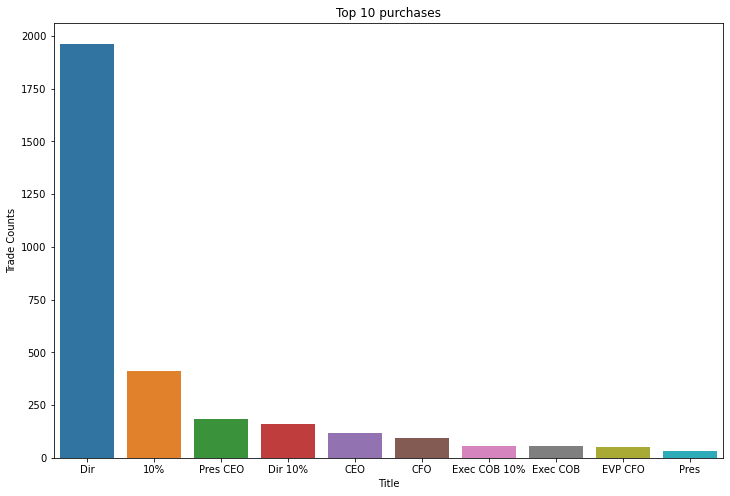

In [42]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Title", y="Trade Counts", data=insider_purchase.sort_values(by="Trade Counts", ascending=False).head(10))
plt.title("Top 10 purchases")

In [52]:
insider_sale = insider_sale.groupby("Title", as_index=False).sum("Trade Counts")
insider_sale.head()
# plt.figure(figsize=(12,8))
# ax = sns.barplot(x="Title", y="Trade Counts", data=insider_sale.sort_values(by="Trade Counts", ascending=False).head(10))
# plt.title("Top 10 sell-offs")

,Title,Trade Counts
0,"""Officer"" Under Sec 16 Rules",1
1,"""Officer"" Under Sec. 16 Rules",5
2,(See Remarks),2
3,*,5
4,* See Remarks,10


In [44]:
new = insider_sale.sort_values(by="Trade Counts", ascending=False)
new.head(10)

,Title,Transaction Type,Trade Counts
699,Dir,S - Sale,3913
700,Dir,S - Sale+OE,1750
155,CFO,S - Sale,851
10,10%,S - Sale,792
2042,Pres CEO,S - Sale,774
52,CEO,S - Sale,711
156,CFO,S - Sale+OE,703
2043,Pres CEO,S - Sale+OE,654
53,CEO,S - Sale+OE,506
729,EVP,S - Sale,463
